In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import os
from dotenv import load_dotenv

In [10]:
query = 'SELECT * FROM Hechos.Contenido'

In [17]:
# Parámetros de conexión
load_dotenv()

server = 'DESKTOP-SQTH3VF'  # O la dirección IP
database = 'Netflix'
username = os.getenv('SQL_SERVER_USER')
password = os.getenv('SQL_SERVER_PASSWORD')

# Crear la cadena de conexión
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Conectar a la base de datos
conn = pyodbc.connect(conn_str)

# Leer datos
df = pd.read_sql(query, conn)

# Ver los primeros datos
print(df.head(5))

# Cerrar la conexión
conn.close()


  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1     s10    Movie          The Starling   Theodore Melfi   
2    s100  TV Show          On the Verge             None   
3   s1000    Movie              Stowaway        Joe Penna   
4   s1001    Movie              Wild Dog  Ahishor Solomon   

                                                cast                 country  \
0                                               None           United States   
1  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...           United States   
2  Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...   France, United States   
3  Anna Kendrick, Toni Collette, Daniel Dae Kim, ...  Germany, United States   
4  Nagarjuna Akkineni, Dia Mirza, Saiyami Kher, A...                    None   

  date_added  release_year rating  duration    Type1  \
0 2021-09-25        2020.0  PG-13      90.0  Minutes   
1 2021-09-24        2021.0  PG-13     10

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12404\2590241799.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Pregunta a responder

## ¿A disminuido la duración de las peliculas a lo largo de los años?

In [18]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Type1,description,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,2021-09-25,2020.0,PG-13,90.0,Minutes,"As her father nears the end of his life, filmm...",Documentaries
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104.0,Minutes,A woman adjusting to life after a loss contend...,"Comedies, Dramas"
2,s100,TV Show,On the Verge,None,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States",2021-09-07,2021.0,TV-MA,1.0,Season,"Four women — a chef, a single mom, an heiress ...","TV Comedies, TV Dramas"


In [19]:
df.shape

(8806, 13)

# Filtrado y limpieza de Datos

In [20]:
# Tomar solo Peliculas

movies = df['type'] == 'Movie'

df_filtered = df[movies]
df_filtered.shape

(6130, 13)

In [22]:
# Selección de columnas de interes

df_filtered = df_filtered[['title', 'country', 'Category', 'release_year', 'duration']]

df_filtered.head(3)

,title,country,Category,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020.0,90.0
1,The Starling,United States,"Comedies, Dramas",2021.0,104.0
3,Stowaway,"Germany, United States","Dramas, International Movies, Thrillers",2021.0,116.0


In [26]:
df_filtered.dtypes

title            object
country          object
Category         object
release_year    float64
duration        float64
dtype: object

In [27]:
categories = df_filtered['Category'].drop_duplicates()
categories.head(50)

0                                          Documentaries
1                                       Comedies, Dramas
3                Dramas, International Movies, Thrillers
4               Action & Adventure, International Movies
6                         Comedies, International Movies
9                     Children & Family Movies, Comedies
12                              Children & Family Movies
18                                             Thrillers
20                                                Dramas
21     Action & Adventure, Comedies, International Mo...
22                          Dramas, International Movies
23      Comedies, International Movies, Music & Musicals
24                          Documentaries, Sports Movies
25        Dramas, International Movies, Music & Musicals
26                   Documentaries, International Movies
27                  Comedies, Dramas, Independent Movies
29      Dramas, Independent Movies, International Movies
30     Children & Family Movies

### Limpiar categorías (Ya que son muchas)

[Acerca de la función 💡](https://github.com/Elkinrodriguez77/doc_python/blob/main/notas.md#separar_texto_en_columnas)

In [29]:
df_filtered['Category'] = df_filtered['Category'].apply(lambda x: x.split(',')[0].strip())

# Muestra las primeras 3 filas para verificar los cambios
df_filtered.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12404\971408635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Category'] = df_filtered['Category'].apply(lambda x: x.split(',')[0].strip())


,title,country,Category,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020.0,90.0
1,The Starling,United States,Comedies,2021.0,104.0
3,Stowaway,"Germany, United States",Dramas,2021.0,116.0
4,Wild Dog,None,Action & Adventure,2020.0,126.0
5,Oloibiri,"Canada, Nigeria, United States",Dramas,2015.0,86.0


In [33]:
categories2 = df_filtered['Category'].drop_duplicates()
print(categories2)

0                  Documentaries
1                       Comedies
3                         Dramas
4             Action & Adventure
9       Children & Family Movies
18                     Thrillers
33                 Horror Movies
64                   Cult Movies
123         International Movies
143               Classic Movies
194              Stand-Up Comedy
563             Music & Musicals
579                           NA
645             Sci-Fi & Fantasy
774              Romantic Movies
1186              Anime Features
1317                LGBTQ Movies
1981          Independent Movies
2124                      Movies
5520               Sports Movies
Name: Category, dtype: object


### Asignación de colores para algunas categorías

In [34]:
colores = []

for indice, fila in df_filtered.iterrows():
    if fila['Category'] == 'Documentaries':
        colores.append('blue')
    elif fila['Category'] == 'Comedies':
        colores.append('green')
    elif fila['Category'] == 'Dramas':
        colores.append('blue')
    elif fila['Category'] == 'Horror Movies':
        colores.append('red')
    else:
        colores.append('gray')  

# Gráfico

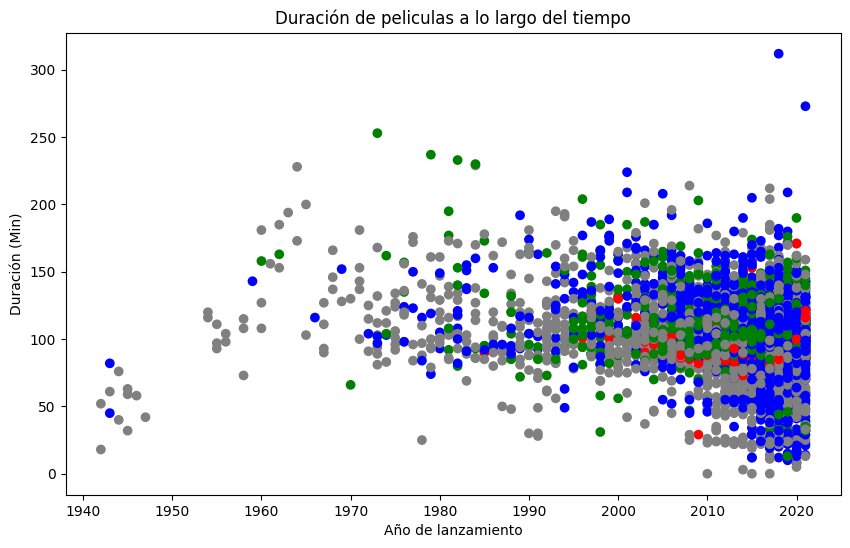

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_filtered['release_year'], df_filtered['duration'], c=colores)
ax.set_xlabel("Año de lanzamiento")
ax.set_ylabel("Duración (Min)")
ax.set_title("Duración de peliculas a lo largo del tiempo")
plt.show()

### ¿Hay alguna correlación entre variables?

In [38]:
correlacion = df_filtered['release_year'].corr(df_filtered['duration'])

print("La correlación entre la duración de las peliculas y su año de lanzamiento es de: ", correlacion)

La correlación entre la duración de las peliculas y su año de lanzamiento es de:  -0.2092054352939108


Hay una correlación negativa debil entre las variables, aunque en el gráfico se puede apreciar una concentración de peliculas de menor duración en los años 2010 a 2020